# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 29.11.2024

Мягий дедлайн: 23:59 11.12.2024

Жестокий дедлайн: 23:59 13.12.2024

### О задании

Задание состоит из трёх разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево для классификации и сравните его со стандартное имплементацией из sklearn.
3. В третьем разделе вы сделаете решающее дерево для регрессии, в листьях которого линейные модели.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 11 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест [ждем контеста] нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__ 11.75

PS Я не совсем поняла, как 11 может быть максимальным баллом, я на калькуляторе пересчитала, это при том, что я не делала доп задание на визуализацию

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

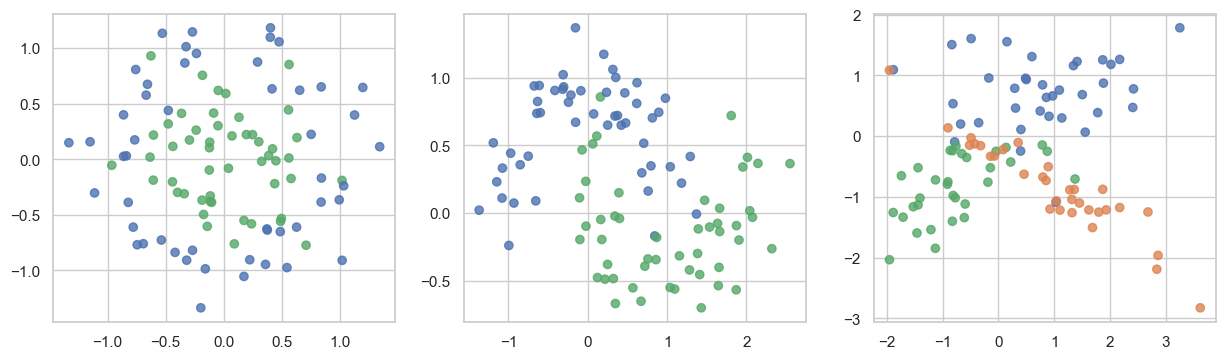

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)
    plt.show()

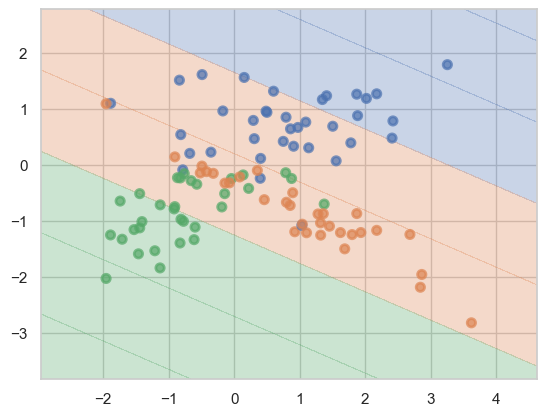

In [6]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

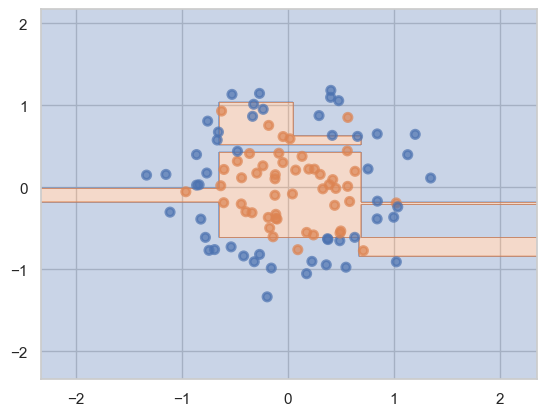

Test accuracy: 0.65
Train accuracy: 1.0


In [7]:
X, y = datasets[0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
plot_surface(clf, X, y)
y_test_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test accuracy: {test_accuracy}')
print(f'Train accuracy: {train_accuracy}')

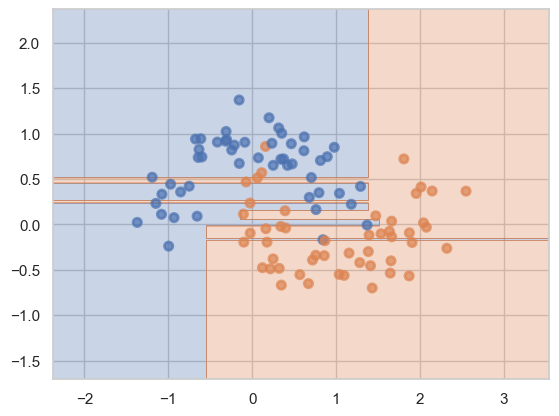

Test accuracy: 0.9
Train accuracy: 1.0


In [8]:
X, y = datasets[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
plot_surface(clf, X, y)
y_test_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test accuracy: {test_accuracy}')
print(f'Train accuracy: {train_accuracy}')

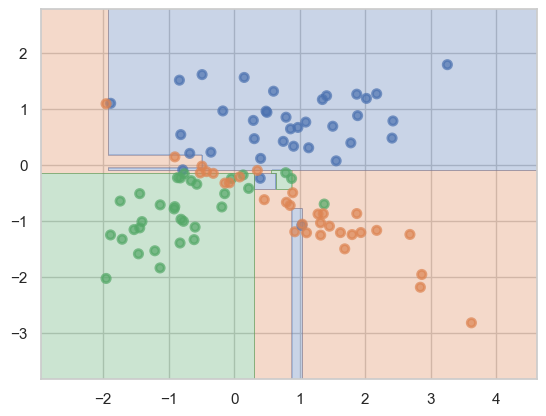

Test accuracy: 0.75
Train accuracy: 1.0


In [9]:
X, y = datasets[2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
plot_surface(clf, X, y)
y_test_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test accuracy: {test_accuracy}')
print(f'Train accuracy: {train_accuracy}')

__Ответ:__ Тот факт, что они на обучающей выборке показывают accuracy = TP+TN/(TP+TN+FP+FN) 1 уже как будто намекает на то, что модель переобучена, к тому же, первая модель при этом показывает на порядок более плоъой результат на тестовой выборке. То же касается и 3 модели, про 2 сложнее сказать именно отталкиваясь от accuracy, так как там и на тестовой ввборке он достаточно высокий (0.9). Однако в этом случае мы можем посмотреть на визуализации и увидеть, что все модели выделяют отдельные зоны под какой-то один объект выборки, что точно намекает на переобученность.

__Задание 2. (1.25 баллов)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

__Бонус (0.75 баллов)__

Вместо того, чтобы рисовать  кучу графиков, сделайте интерактивную визуализацию разделяющей гиперплоскости с помощью библиотеки `plotly` (конкретнее, вам пригодится `plotly.graph_objects`): у вас должен получиться виджет с ползунком, по которому можно выбрать параметры `max_depth` и `min_samples_leaf` и посмотреть, как в зависимости от них меняется разделяющая поверхность и прогнозы модели. Если всё сделать аккуратно, получится очень красиво. Помните, что при загрузке в anytask виджеты могут много весить и надо подождать. Если ваш ноутбук не загружается -- попробуйте загрузить сначала с очищенным выводом этой ячейки. 

Заранее предупреждаем, что бонус сложный. Полезно будет ознакомиться:
 - https://plotly.com/python/sliders/
 - https://plotly.com/python/dropdowns/
 - https://plotly.com/python/knn-classification/

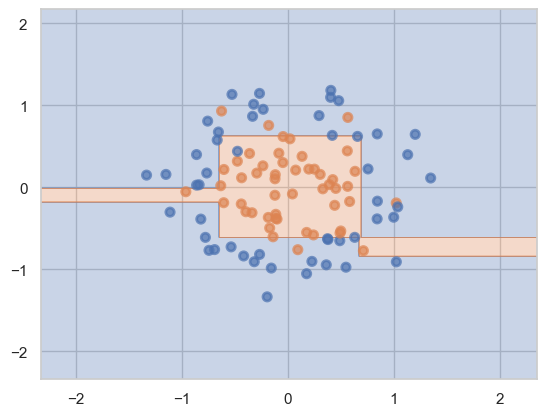

max_depth= 4, min_samples_leaf=1
Test accuracy: 0.85
Train accuracy: 0.95


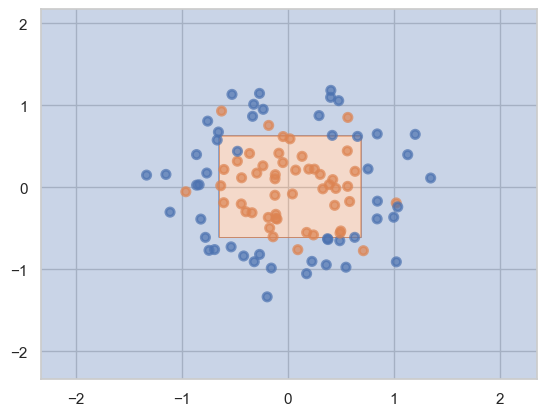

max_depth= 4, min_samples_leaf=6
Test accuracy: 0.85
Train accuracy: 0.925


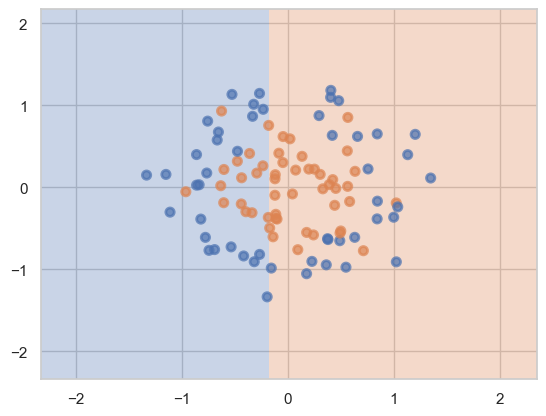

max_depth= 4, min_samples_leaf=30
Test accuracy: 0.7
Train accuracy: 0.575


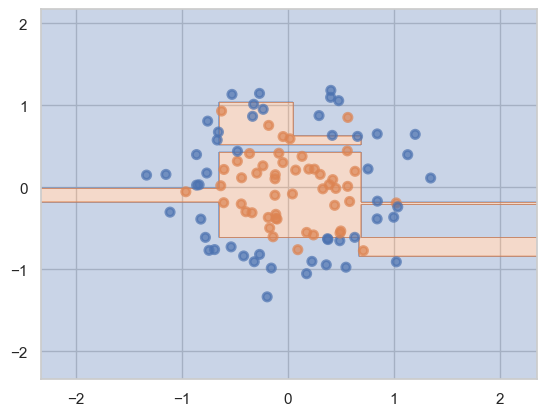

max_depth= 10, min_samples_leaf=1
Test accuracy: 0.65
Train accuracy: 1.0


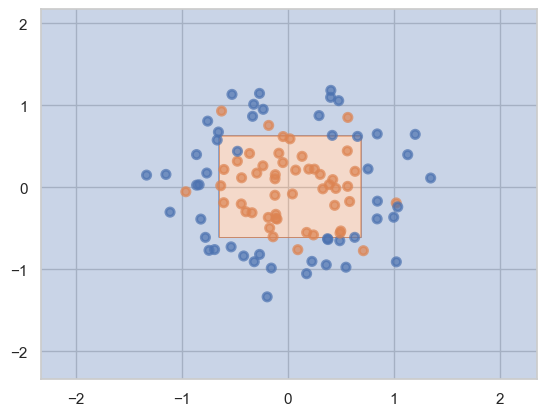

max_depth= 10, min_samples_leaf=6
Test accuracy: 0.85
Train accuracy: 0.925


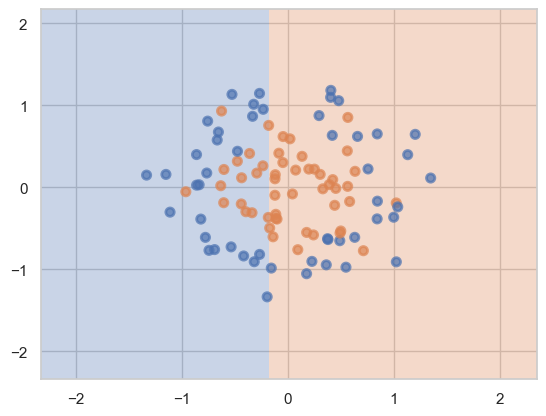

max_depth= 10, min_samples_leaf=30
Test accuracy: 0.7
Train accuracy: 0.575


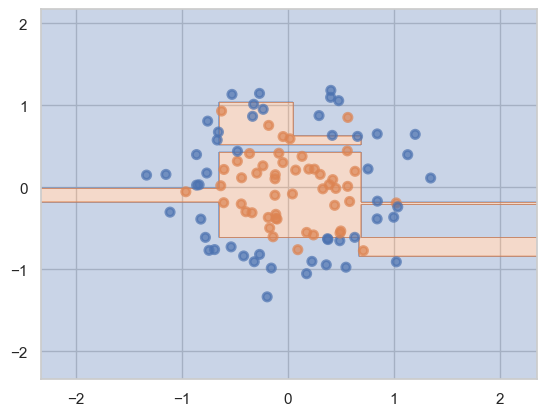

max_depth= 50, min_samples_leaf=1
Test accuracy: 0.65
Train accuracy: 1.0


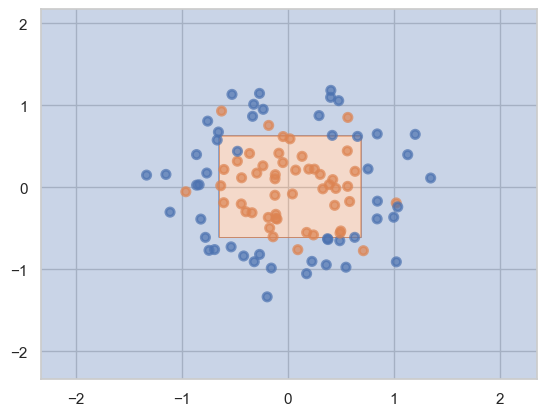

max_depth= 50, min_samples_leaf=6
Test accuracy: 0.85
Train accuracy: 0.925


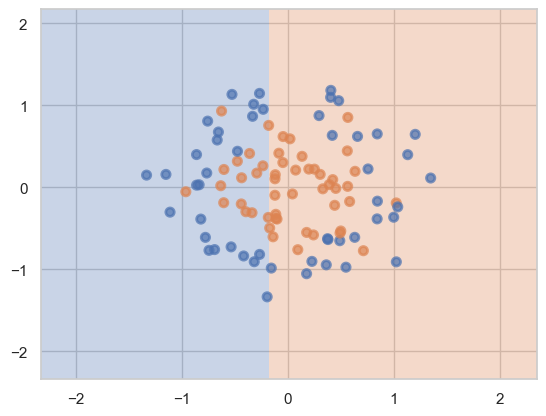

max_depth= 50, min_samples_leaf=30
Test accuracy: 0.7
Train accuracy: 0.575


In [10]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X, y = datasets[0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
max_depth = [4, 10, 50]
min_sample_leaf = [1, 6, 30]
for depth in max_depth:
    for sample in min_sample_leaf:
        clf = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=sample, random_state=42)
        clf.fit(X_train, y_train)
    
        plot_surface(clf, X, y)
        y_test_pred = clf.predict(X_test)
        y_train_pred = clf.predict(X_train)
        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        print(f'max_depth= {depth}, min_samples_leaf={sample}')
        print(f'Test accuracy: {test_accuracy}')
        print(f'Train accuracy: {train_accuracy}')

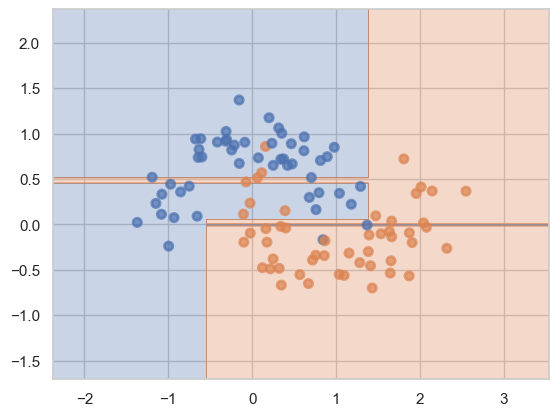

max_depth= 4, min_samples_leaf=1
Test accuracy: 0.85
Train accuracy: 0.9625


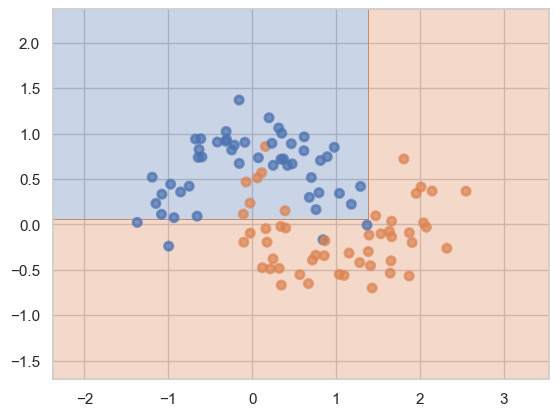

max_depth= 4, min_samples_leaf=6
Test accuracy: 0.8
Train accuracy: 0.9125


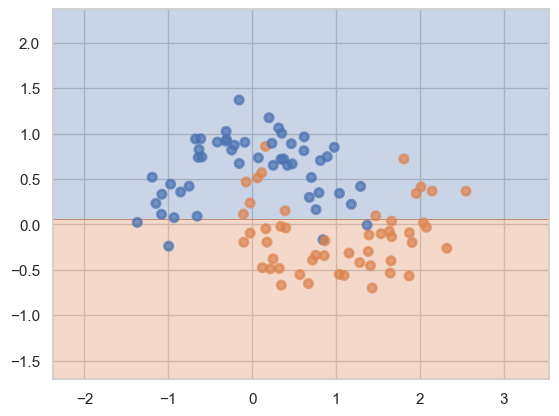

max_depth= 4, min_samples_leaf=30
Test accuracy: 0.8
Train accuracy: 0.8375


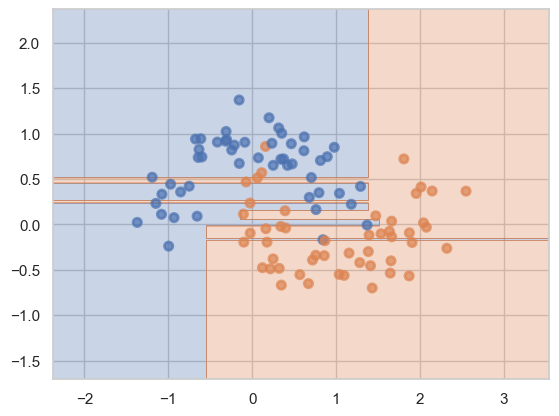

max_depth= 10, min_samples_leaf=1
Test accuracy: 0.9
Train accuracy: 1.0


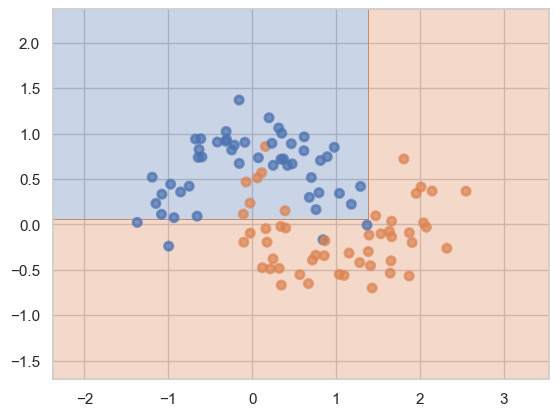

max_depth= 10, min_samples_leaf=6
Test accuracy: 0.8
Train accuracy: 0.9125


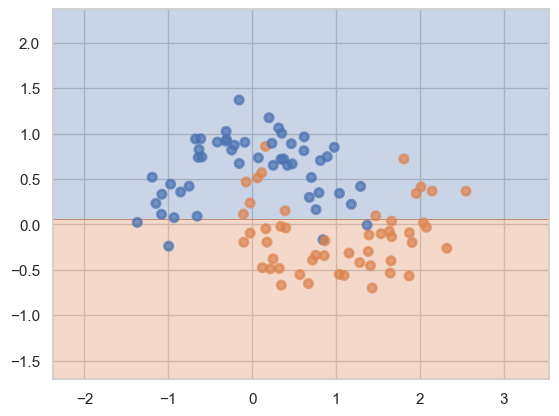

max_depth= 10, min_samples_leaf=30
Test accuracy: 0.8
Train accuracy: 0.8375


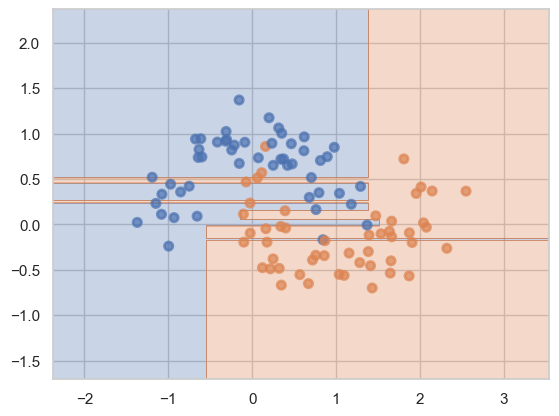

max_depth= 50, min_samples_leaf=1
Test accuracy: 0.9
Train accuracy: 1.0


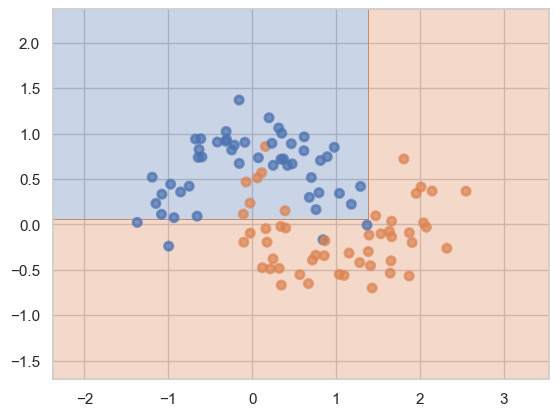

max_depth= 50, min_samples_leaf=6
Test accuracy: 0.8
Train accuracy: 0.9125


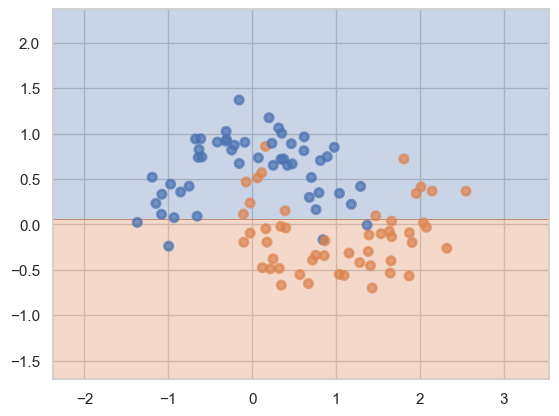

max_depth= 50, min_samples_leaf=30
Test accuracy: 0.8
Train accuracy: 0.8375


In [11]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X, y = datasets[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
max_depth = [4, 10, 50]
min_sample_leaf = [1, 6, 30]
for depth in max_depth:
    for sample in min_sample_leaf:
        clf = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=sample, random_state=42)
        clf.fit(X_train, y_train)
    
        plot_surface(clf, X, y)
        y_test_pred = clf.predict(X_test)
        y_train_pred = clf.predict(X_train)
        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        print(f'max_depth= {depth}, min_samples_leaf={sample}')
        print(f'Test accuracy: {test_accuracy}')
        print(f'Train accuracy: {train_accuracy}')

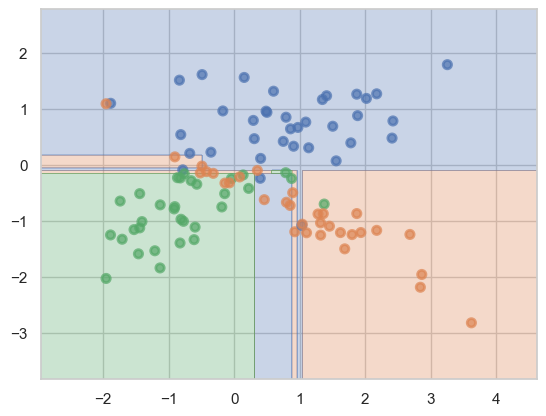

max_depth= 4, min_samples_leaf=1
Test accuracy: 0.7
Train accuracy: 0.9625


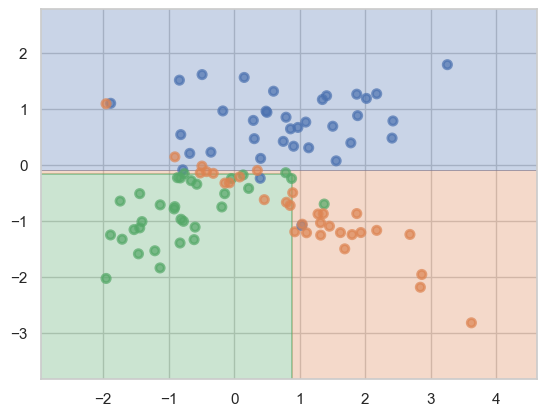

max_depth= 4, min_samples_leaf=6
Test accuracy: 0.7
Train accuracy: 0.9


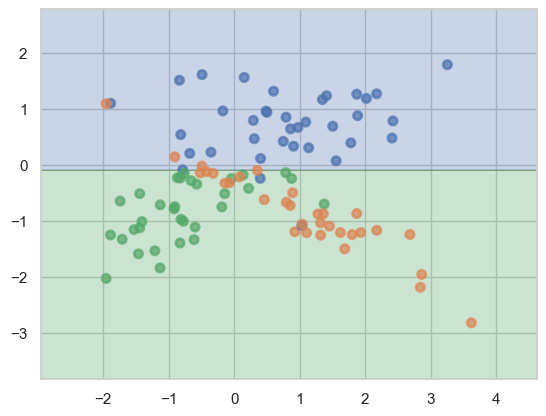

max_depth= 4, min_samples_leaf=30
Test accuracy: 0.65
Train accuracy: 0.6625


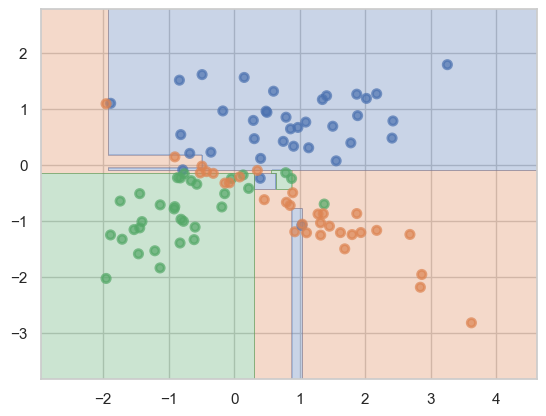

max_depth= 10, min_samples_leaf=1
Test accuracy: 0.75
Train accuracy: 1.0


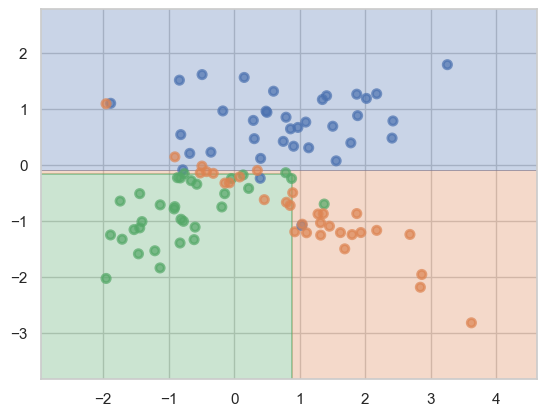

max_depth= 10, min_samples_leaf=6
Test accuracy: 0.7
Train accuracy: 0.9


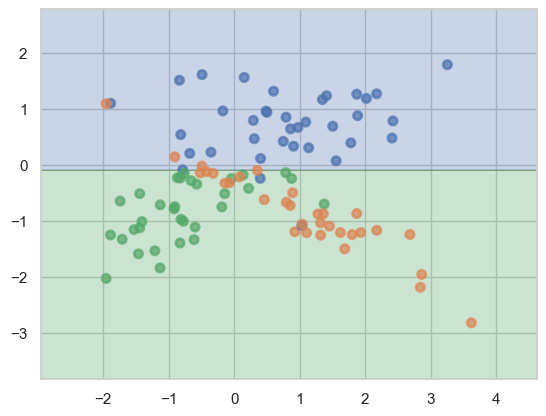

max_depth= 10, min_samples_leaf=30
Test accuracy: 0.65
Train accuracy: 0.6625


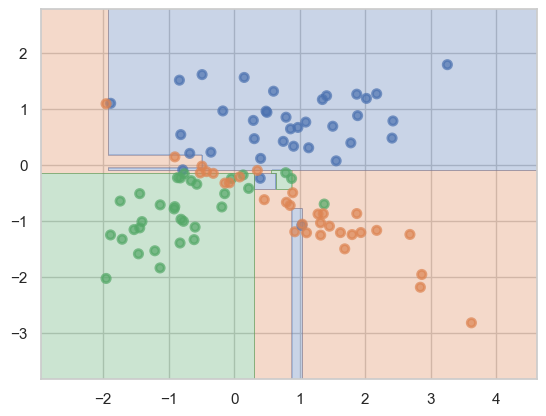

max_depth= 50, min_samples_leaf=1
Test accuracy: 0.75
Train accuracy: 1.0


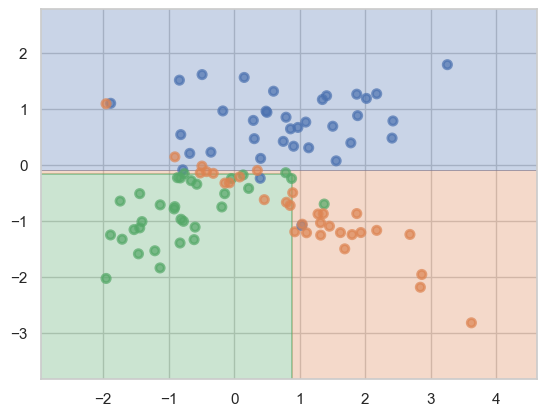

max_depth= 50, min_samples_leaf=6
Test accuracy: 0.7
Train accuracy: 0.9


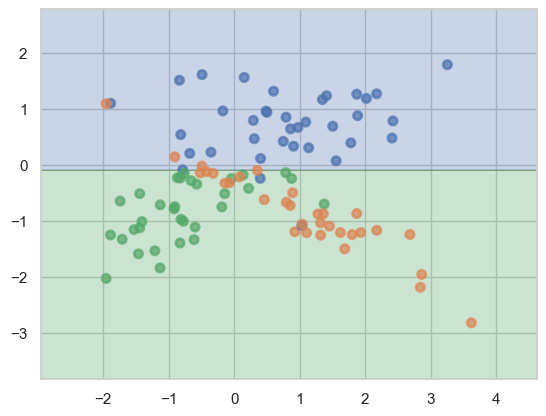

max_depth= 50, min_samples_leaf=30
Test accuracy: 0.65
Train accuracy: 0.6625


In [12]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X, y = datasets[2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
max_depth = [4, 10, 50]
min_sample_leaf = [1, 6, 30]
for depth in max_depth:
    for sample in min_sample_leaf:
        clf = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=sample, random_state=42)
        clf.fit(X_train, y_train)
    
        plot_surface(clf, X, y)
        y_test_pred = clf.predict(X_test)
        y_train_pred = clf.predict(X_train)
        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        print(f'max_depth= {depth}, min_samples_leaf={sample}')
        print(f'Test accuracy: {test_accuracy}')
        print(f'Train accuracy: {train_accuracy}')

__Ответ:__ В данном случае изменение максимальной глубины и минимального количества листьев вершине влияет похожим образом на все датасеты. Видно, что если минимальное число листьев в вершине = 1, модель начинает переобучаться, а если их 30, то модель делит пространство на 2 части, на более точные предсказания не хватает точности. Это касается и 3 датасета, в котором класса так-то 3. Ну и вполне логично, что большая максимальная глубина не спасает от этого, если минимальное количество листьев в вершине слишком большое. Также большая максимальная глубина при маленьких ограничениях на min_samples_leaf ведет к переобучению.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

https://youtu.be/wQBsb2dC8hg?si=4hQrENrVWUKXBiPA

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

Реализовала 
https://contest.yandex.ru/contest/72492/run-report/129390139/

ник: Елена Парфенюк

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [13]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df = pd.read_csv('students.csv')
df.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0


In [2]:
from hw5code import find_best_split

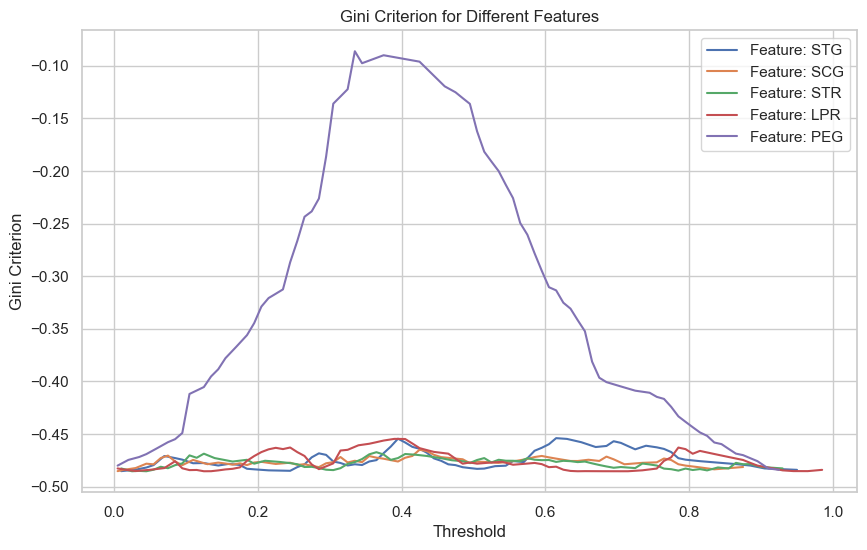

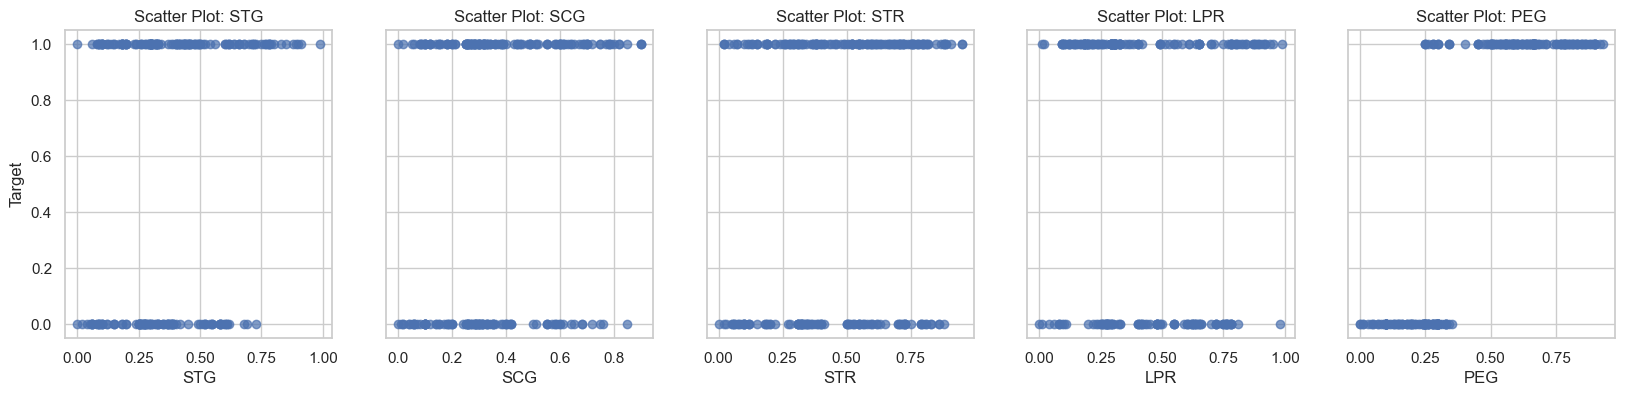

In [15]:
plt.figure(figsize=(10, 6))
data = ['STG', 'SCG', 'STR', 'LPR', 'PEG']

for column in data:
    thresholds, ginis, threshold_best, gini_best = find_best_split(df[column].values, df['UNS'].values)
    plt.plot(thresholds, ginis, label=f"Feature: {column}")

plt.xlabel("Threshold")
plt.ylabel("Gini Criterion")
plt.title("Gini Criterion for Different Features")
plt.legend()
plt.show()

fig, axs = plt.subplots(1, 5, figsize=(20, 4), sharey=True)
for i, column in enumerate(data):
    axs[i].scatter(df[column], df['UNS'], alpha=0.7)
    axs[i].set_xlabel(column)
    axs[i].set_title(f"Scatter Plot: {column}")

axs[0].set_ylabel("Target")
plt.show()

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** Надо разделять по признаку PEG, так как у него самое большое значение критерия Джини. На диаграмме рассеяния видно, у PEG есть четкое разделение на 2 группы. Проблемы с разбиением могут возникнуть, когда на диаграмме рассеяния классы объектов чередуются и их соответветственно сложно отличать. Оптимальное деление выборки происходит, когда существует порог, при котором в 1 лист попадает 1 класс, а в другой лист 2 класс))), тогда критерий Джини будет близким к нулю, а график будет иметь максимум.

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

Ошибки исправила вроде

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

Ссылка на успешную поссылку:

https://contest.yandex.ru/contest/72492/run-report/129691075/

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [36]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
grib = pd.read_csv('agaricus-lepiota.data', sep=',')
grib.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [37]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
grib_encoded = grib.apply(encoder.fit_transform)
grib_encoded.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
1,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
2,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
3,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
4,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1


In [38]:
from hw5code import DecisionTree

In [39]:
X_train, X_test, y_train, y_test = train_test_split(grib_encoded.drop(['p'], axis=1), grib_encoded['p'], test_size=0.5, random_state=42)
dt = DecisionTree(["categorical"] * X_train.shape[1])
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test.to_numpy())
print(f"Test accuracy: {accuracy_score(y_pred, y_test)}")

Test accuracy: 1.0


__Задание 8. (1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe.

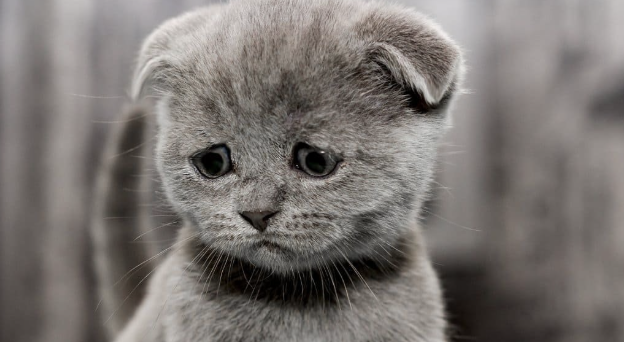

успеть до дедлайна успеть до дедлайнауспеть до дедлайнауспеть до дедлайнауспеть до дедлайнауспеть до дедлайнауспеть до дедлайнауспеть до дедлайнауспеть до дедлайнауспеть до дедлайнауспеть до дедлайнауспеть до дедлайнауспеть до дедлайнауспеть до дедлайнауспеть до дедлайнауспеть до дедлайнауспеть до дедлайнауспеть до дедлайнауспеть до дедлайнауспеть до дедлайнауспеть до дедлайнауспеть до дедлайнауспеть до дедлайнауспеть до дедлайнауспеть до дедлайнауспеть до дедлайнауспеть до дедлайна

In [3]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
#в функцию все добавила
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv("tic-tac-toe-endgame.csv")
data.head()
encoder = LabelEncoder()
data = data.apply(encoder.fit_transform)
data.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,2,2,2,2,1,1,2,1,1,1
1,2,2,2,2,1,1,1,2,1,1
2,2,2,2,2,1,1,1,1,2,1
3,2,2,2,2,1,1,1,0,0,1
4,2,2,2,2,1,1,0,1,0,1


In [4]:
X = data.drop(columns=["V10"])
y = data["V10"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

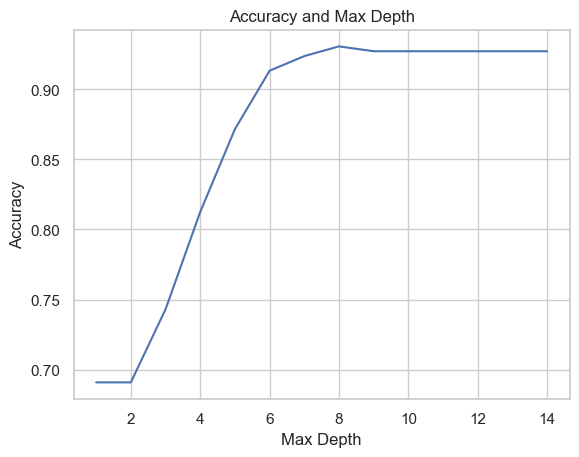

In [6]:
depths = range(1, 15)
accuracies = []

for depth in depths:
    tree = DecisionTree(feature_types=["categorical"] * X_train.shape[1], max_depth=depth)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test.to_numpy())
    accuracies.append(accuracy_score(y_test, y_pred))

plt.plot(depths, accuracies)
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Accuracy and Max Depth")
plt.show()

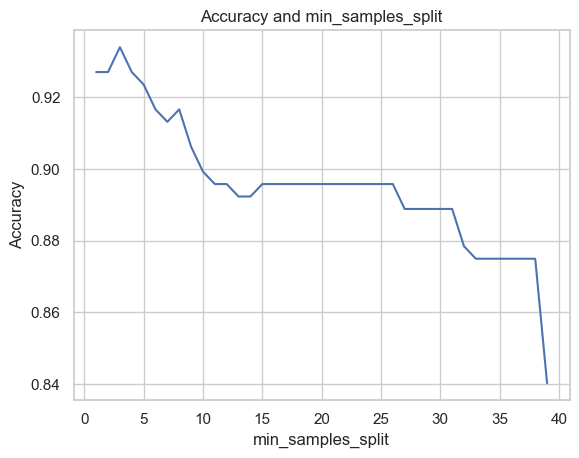

In [8]:
min_samples_split = range(1, 40)
accuracies = []

for split in min_samples_split:
    tree = DecisionTree(feature_types=["categorical"] * X_train.shape[1], min_samples_split=split)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test.to_numpy())
    accuracies.append(accuracy_score(y_test, y_pred))

plt.plot(min_samples_split, accuracies)
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.title("Accuracy and min_samples_split")
plt.show()

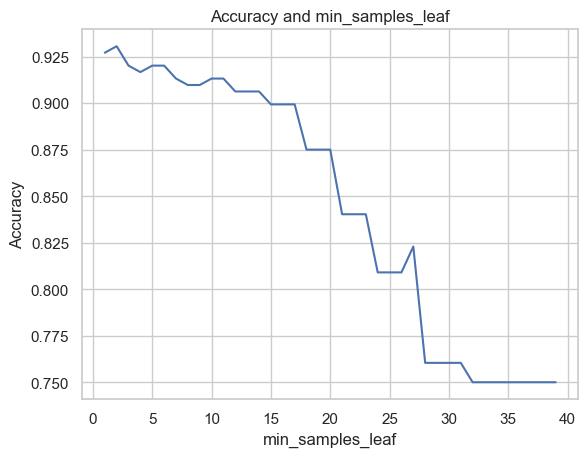

In [9]:
min_samples_leaf = range(1, 40)
accuracies = []

for leaf in min_samples_leaf:
    tree = DecisionTree(feature_types=["categorical"] * X_train.shape[1], min_samples_leaf=leaf)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test.to_numpy())
    accuracies.append(accuracy_score(y_test, y_pred))

plt.plot(min_samples_leaf, accuracies)
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.title("Accuracy and min_samples_leaf")
plt.show()

__Задание 9. (до 3-х баллов)__

Реализуйте класс `LinearRegressionTree`:

 - Если вам удобно, можете сделать его наследуемым от `DecisionTree` и переопределить только необходимые методы. Можете добавить новые — как вам нравится.
 - В листьях находятся не константные предсказания, а линейные модели (можно использовать из библиотеки `sklearn`).
 - Ваша реализация должна решать задачу __регрессии__, поэтому для поиска оптимального разбиения нужно написать новую функцию.
 - **Максимум 1.8 балла, если**:
   - В качестве критерия для разбиения считаете среднее квадратное/абсолютное отклонение
   - Итерируетесь по всем порогам
   - Ваша реализация строится как обычное решающее дерево для регрессии, но в листьях линейные модели.
   - Есть поддержка параметра max_depth
 - **Максимум три балла, если выполнено следующее**:
     - Для разбиения перебираются не все пороги. Пороги выбираются из значений признаков, разбитых на квантили.
     - Для разбиении выбирается порог, который минимизирует суммарную ошибку линейных моделей после разбиения: $$\text{loss} = \frac{n_{left}}{n} \cdot \text{loss}_{left} + \frac{n_{right}}{n} \cdot \text{loss}_{right}$$ (Разумеется, для оценки этих ошибок вам надо будет строить много линейных моделей, это не дисперсии. В качестве функционала ошибки возьмите MAE или MSE)
     - Есть поддержка параметров max_depth, min_samples_split, min_samples_leaf

Я тут реализовала по максимумальным требованиям короче, но именно из последних сил, поэтому в работу были вовлечены хабр, гит, гпт и все все все

In [1]:
from hw5code import LinearRegressionTree

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import accuracy_score
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

__Задание 10. (1 балл)__

Проведите эксперименты с реализованным вами линейным деревом на любом подходящем датасете из sklearn (https://scikit-learn.org/1.5/datasets/real_world.html), который вам нравится. Подберите лучшие гиперпараметры (max_depth и остальные, если вы их реализовывали). Сравните ваше дерево со стандартным деревом для регрессии из sklearn, для него тоже подберите гиперпараметры.

В общем у меня вообще ни в какую не получилось загрузить датафрейм, даже с гптшкой, а у меня час до делайна и твердая решимость не брать просрочку

Посмотрите, что будет, если обучить ваше дерево на данных, которые сгенерированы внизу. Нарисуйте график с предсказаниями и таргетами на всей выборке, сравните с обычным деревом.

Напишите, какие достоинства и недостатки вы видите у реализованного вами линейного дерева.

НЕ СЧИТЫВАЕЕЕЕТСЯ

В общем я все попробовала ничего не помогло считать эти датасеты, я просто построила на данном датасете

Это дефолтная модель

R2 для DecisionTreeRegressor: 0.9724623012554942


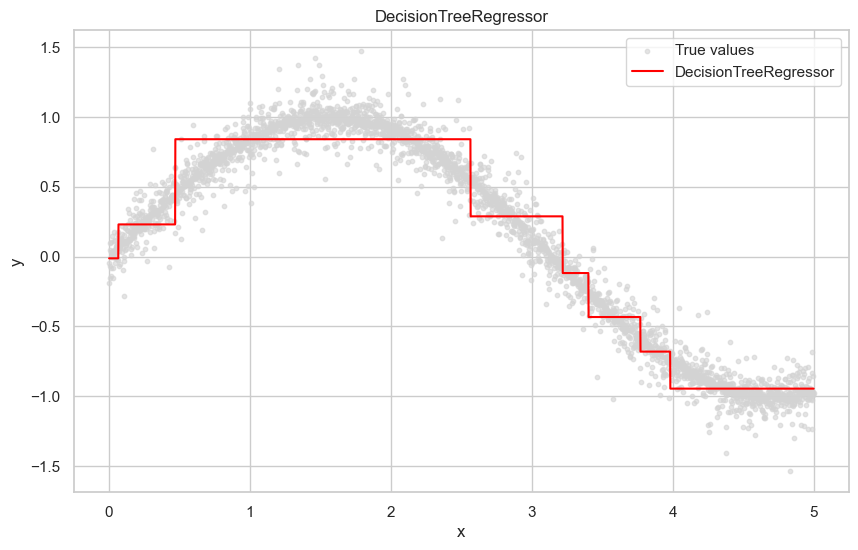

In [3]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

n_samples = 3_000
x = np.linspace(0, 5, n_samples).reshape(-1, 1)
y = np.sin(x.flatten()) + np.random.normal(0, 0.1, n_samples) * np.random.normal(0, 1, n_samples)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.95, random_state=0x4b524f4c2d562d53544f594c4f % (2 ** 32 - 1))

reg_tree = DecisionTreeRegressor(max_depth=3, random_state=42)
reg_tree.fit(x_train, y_train)
y_pred_tree = reg_tree.predict(x)
r2_reg_tree = np.sqrt(r2_score(y, y_pred_tree))
print(f"R2 для DecisionTreeRegressor: {r2_reg_tree}")

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='lightgray', s=10, label='True values', alpha=0.6)
plt.plot(x, y_pred_tree, color='red', label='DecisionTreeRegressor')
plt.title('DecisionTreeRegressor')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

R2 для LinearRegressionTree: 0.9814416610733087


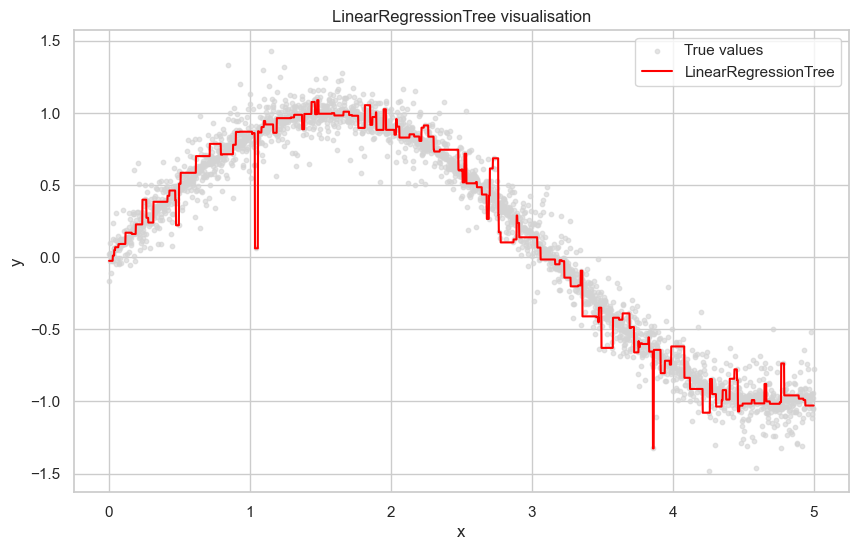

In [4]:
n_samples = 3_000

x = np.linspace(0, 5, n_samples).reshape(-1, 1)
y = np.sin(x.flatten()) + np.random.normal(0, 0.1, n_samples) * np.random.normal(0, 1, n_samples)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.95, random_state=0x4b524f4c2d562d53544f594c4f % (2 ** 32 - 1))


lin_tree = LinearRegressionTree(max_depth=3000000)
lin_tree.fit(x_train, y_train)
y_pred_lin_tree = lin_tree.predict(x)
r2_lin_tree = np.sqrt(r2_score(y, y_pred_lin_tree))
print(f"R2 для LinearRegressionTree: {r2_lin_tree}")

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='lightgray', s=10, label='True values', alpha=0.6)
plt.plot(x, y_pred_lin_tree, color='red', label='LinearRegressionTree')
plt.title('LinearRegressionTree visualisation')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

Чуть чуть (не чуть чуть) переобучилась, а так она прям получше стала

Ща я еще параметры поподбираю

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

param_grid = {
    'max_depth': range(1, 10),
    'min_samples_split': range(1, 40),
    'min_samples_leaf': range(1, 40)
}

model = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, 
                        scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
model.fit(x_train, y_train)

best_dtr = model.best_estimator_
y_pred = best_dtr.predict(x_test)
r2 = np.sqrt(r2_score(y_test, y_pred))

print(f"R2 для DecisionTreeRegressor: {r2}")

R2 для DecisionTreeRegressor: 0.9863396165921438


Это для встроенной модели

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

param_grid = {
    'max_depth': range(1, 10),
    'min_samples_split': range(1, 40),
    'min_samples_leaf': range(1, 40)
}

model = GridSearchCV(LinearRegressionTree(), param_grid, 
                        scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
model.fit(x_train, y_train)

best_dtr = model.best_estimator_
y_pred = best_dtr.predict(x_test)
r2 = np.sqrt(r2_score(y_test, y_pred))

print(f"R2 для DecisionTreeRegressor: {r2}")

R2 для DecisionTreeRegressor: 0.9885366989529679


Это для моей модели

**Ответ:** АААААААААААА

Моя модель легче переобучается, но показывает чуть чуть более высокое качество. А еще она долго строится относительно

Вставьте что угодно, описывающее ваши впечатления от этого задания:

Чет прям тяжелое дз если честно, я утомилась

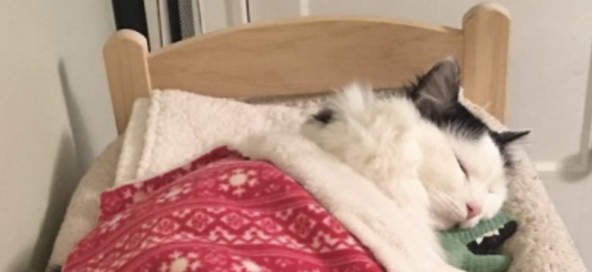

Я после того как скинула эту домашку